#### 웹페이지 데이터 수집
- 웹브라우저에 보이는 데이터(텍스트, url, 이미지 등등..)를 수집
- 수집 방법 : 정적웹페이지 수집, 동적 웹페이지 수집
- 정적 웹페이지 수집 : BeautifulSoup 라이브러리 사용 (Open-API 방식과 유사)
    - 정적 : 브라우저의 페이지 이동 없이, 현재 보이는 페이지에서만 데이터 수집하는 경우
- 동적 웹페이지 수집 : Selenium 라이브러리 사용
    - 동적 : 브라우저의 페이지에서 클릭(click)을 통해 페이지가 바뀌는 처리를 포함해서 수집하는 경우

- 웹 데이터 수집 순서
    - 1. 크롬 브라우저를 제어하기 위한 브라우저 드라이버 연결
    - 2. 브라우저에 수집 URL(페이지) 요청하기 -> 동시에 페이지 정보(html) 받아오기 (수집)
    - 3. 받아온 html은 문자열 타입 -> html 타입으로 의미 부여하기
    - 4. 의미가 부여된 html 코드 내에서 태그 이름과 속성을 이용해 데이터 조회하기
        - 데이터 조회는 태그와 태그 사이의 text 값을 추출함
        - 태그 내에 속성(key)의 값(value)을 추출할 수도 있음
    - 5. 조회한 데이터프레임 또는 파일로 저장
    - 6. 저장된 데이터를 이용해서 분석

- HTML 태그에서 사용되는 용어
    - 태그 : 기호(<이름>)을 사용, 태그 내에 있는 첫번째 문자를 태그 이름이라고 함
    - 데이터 : 태그와 태그 사이의 문자, 또는 속성에 정의된 값
    - 속성 : 태그 내에 정의된 변수(key=value 형태로 되어 있음)
    - id 속성 : 고유한 이름값(value)을 가지는 한개 태그
        - 고유한 이름값을 가지는 특정 태그를 찾을 때 사용됨
    - class 속성 : 같은 이름값(value)을 가지는 여러개 태그들
        - 동일한 class 이름값을 가지는 여러 태그를 찾을 때 사용됨

- 사용 라이브러리
    - 웹 브라우저 컨트롤 라이브러리 : selenium (설치필요, pip install selenium)
    - 수집된 html 문자열 데이터에 html 타입으로 의미를 부여하는 라이브러리
        - 정적 페이지 처리 라이브러리
            - BeautifulSoup (정적 페이지 처리시에만 사용, 태그 정보 조회 함수들 포함)
        - 동적 페이지 처리 라이브러리
            - selenium (html 타입으로 의미를 부여하지 않아도 됨, 바로 조회 사용, 정적 페이지 처리도 가능)

#### 라이브러리 정의하기

In [1]:
### 웹브라우저 오픈을 위한 라이브러리
# - 브라우저 제어

from selenium import webdriver

### 수집된 html 정보에 html 타입으로 의미 부여 및 태그 정보 조회(정적)
from bs4 import BeautifulSoup

### 데이터 처리
import pandas as pd

#### 웹브라우저 연결 및 Open

In [2]:
### 크롬 드라이버 활용하여 웹브라우저 Open
driver = webdriver.Chrome()

In [3]:
### 웹브라우저 종료하기
driver.quit()

In [4]:
### 크롬 브라우저 Open 함수
def getDriver() :
    return webdriver.Chrome()

In [5]:
driver = getDriver()

In [6]:
driver.quit()

#### 브라우저에 URL 페이지 요청 및 HTML 정보 받아오기

In [7]:
### 브라우저 Open
driver = getDriver()

In [8]:
### 수집할(요청할) URL 정의하기
url = "https://www.naver.com"

### 브라우저에 전달하여 URL을 request로 네이버 서버에 URL 전달 및 결과 받아오기
# - get() : 서버에 요청(request)과 응답(response)을 동시에 수행하는 함수
# - 응답 받은 정보를 별도로 변수에 저장하지 않아도 됨
# - 브라우저 즉, driver 메모리에 저장되어 있음(Chrome 클래스 메모리)
driver.get(url)

#### 요청 후 응답받은 HTML 정보 확인하기

'<html lang="ko" class="fzoom" data-dark="false"><head><script async="" src="https://ntm.pstatic.net/ex/nlog.js"></script><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="
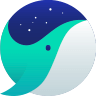
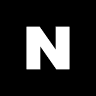

In [9]:
### 응답 받은 페이지 정도(HTML 코드 정보) 확인
# - 최초 코드 정보의 타입은 문자열(str)타입
html = driver.page_source

### 정적 페이지 처리(현재 페이지에서만 데이터 수집인 경우)에서는
# - page_source를 이용해서 HTML 코드를 받아서 변수에 넣은 후
# 웹브라우저를 종료(quit) 해도 괜찮은 이유는 이미 값을 다 변수에 저장 했기 때문
html

<html class="fzoom" data-dark="false" lang="ko"><head><script async="" src="https://ntm.pstatic.net/ex/nlog.js"></script><script async="" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js" type="text/javascript"></script> <meta charset="utf-8"/> <meta content="origin" name="Referrer"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <title>NAVER</title> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https:/
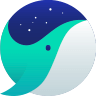
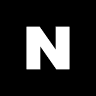

In [10]:
### 문자열 html 타입의 정보를 -> html 타입으로 의미 부여하기
# - parser(파서) : 변환기라는 의미, html 문자열을 html 타입으로 의미부여하는 변환기
BeautifulSoup(html, "html.parser")

In [11]:
# 브라우저 종료하기
driver.quit()

#### HTML 코드 보는 연습하기

In [12]:
html = """
<html>
	<!-- head 영역 : 페이지 기본 정보, 함수, 스타일 정의 -->
	<head>
		<title>페이지 제목 ::: 웹크롤링</title>
	</head>
	<!-- body 영역 : 우리 눈에 보이는 영역 -->
	<body>
		<h3>우리 동네 시장 정보</h3>
		<hr/>
		<div class="sale">
			<p id="fruits1" class="fruits">
				<span class="name">바나나</span>
				<span class="price">3000원</span>
				<span class="inventory">500개</span>
				<span class="store">가나다상회</span>
				<a href="http://www.naver.com">홈페이지 바로가기 링크</a>
			</p>
		</div>
		<div class="prepare">
			<p id="fruits2" class="fruits">
				<span class="name">파인애플</span>
				<span class="price">10000원</span>
				<span class="inventory">300개</span>
				<span class="store">우리상회</span>
				<a href="http://www.daum.net">홈페이지 바로가기 링크</a>
			</p>
		</div>
	</body>
</html>
"""

html

'\n<html>\n\t<!-- head 영역 : 페이지 기본 정보, 함수, 스타일 정의 -->\n\t<head>\n\t\t<title>페이지 제목 ::: 웹크롤링</title>\n\t</head>\n\t<!-- body 영역 : 우리 눈에 보이는 영역 -->\n\t<body>\n\t\t<h3>우리 동네 시장 정보</h3>\n\t\t<hr/>\n\t\t<div class="sale">\n\t\t\t<p id="fruits1" class="fruits">\n\t\t\t\t<span class="name">바나나</span>\n\t\t\t\t<span class="price">3000원</span>\n\t\t\t\t<span class="inventory">500개</span>\n\t\t\t\t<span class="store">가나다상회</span>\n\t\t\t\t<a href="http://www.naver.com">홈페이지 바로가기 링크</a>\n\t\t\t</p>\n\t\t</div>\n\t\t<div class="prepare">\n\t\t\t<p id="fruits2" class="fruits">\n\t\t\t\t<span class="name">파인애플</span>\n\t\t\t\t<span class="price">10000원</span>\n\t\t\t\t<span class="inventory">300개</span>\n\t\t\t\t<span class="store">우리상회</span>\n\t\t\t\t<a href="http://www.daum.net">홈페이지 바로가기 링크</a>\n\t\t\t</p>\n\t\t</div>\n\t</body>\n</html>\n'

In [13]:
### 문자열 html을 html 타입으로 의미부여하기
soup = BeautifulSoup(html, "html.parser")
soup


<html>
<!-- head 영역 : 페이지 기본 정보, 함수, 스타일 정의 -->
<head>
<title>페이지 제목 ::: 웹크롤링</title>
</head>
<!-- body 영역 : 우리 눈에 보이는 영역 -->
<body>
<h3>우리 동네 시장 정보</h3>
<hr/>
<div class="sale">
<p class="fruits" id="fruits1">
<span class="name">바나나</span>
<span class="price">3000원</span>
<span class="inventory">500개</span>
<span class="store">가나다상회</span>
<a href="http://www.naver.com">홈페이지 바로가기 링크</a>
</p>
</div>
<div class="prepare">
<p class="fruits" id="fruits2">
<span class="name">파인애플</span>
<span class="price">10000원</span>
<span class="inventory">300개</span>
<span class="store">우리상회</span>
<a href="http://www.daum.net">홈페이지 바로가기 링크</a>
</p>
</div>
</body>
</html>

#### HTML 소스 코드 내에서 정보 조회하기

In [14]:
### span이라는 이름의 태그 정보 모두 추출하기
# - select("태그이름") : 모든 정보를 리스트로 반환
# - soup이 가지고 있는 html 소스 코드 안에서 span이라는 이름을 가지는 모든 태그 정보를 리스트 타입으로 반화(select)
soup.select("span")

[<span class="name">바나나</span>,
 <span class="price">3000원</span>,
 <span class="inventory">500개</span>,
 <span class="store">가나다상회</span>,
 <span class="name">파인애플</span>,
 <span class="price">10000원</span>,
 <span class="inventory">300개</span>,
 <span class="store">우리상회</span>]

In [16]:
### select_one() : span 이라는 태그들 중에 첫번째 조회된 정보만 조회
soup.select_one("span")

<span class="name">바나나</span>

In [17]:
### 태그 중에 p 태그 정보 모두 가지고 오기
soup.select("p")

[<p class="fruits" id="fruits1">
 <span class="name">바나나</span>
 <span class="price">3000원</span>
 <span class="inventory">500개</span>
 <span class="store">가나다상회</span>
 <a href="http://www.naver.com">홈페이지 바로가기 링크</a>
 </p>,
 <p class="fruits" id="fruits2">
 <span class="name">파인애플</span>
 <span class="price">10000원</span>
 <span class="inventory">300개</span>
 <span class="store">우리상회</span>
 <a href="http://www.daum.net">홈페이지 바로가기 링크</a>
 </p>]

In [20]:
### 태그 중에 p 태그 정보 하나 중에서 span 태그 정보 가져오기
# - soup.select_one("p") : html타입이기 때문에 .select("span") 사용 가능
soup.select_one("p").select("span")[0]

# - soup.select_one("p").select("span")[0] 은 리스트 타입이기 때문에 .text 사용하여 텍스트 추출 가능
# 출력 결과 '바나나'

<span class="name">바나나</span>

In [21]:
### div 태그 모두 조회하기
# - 결과값의 타입에 따라서 계속 코드를 이어 조회가 가능
soup.select("div")[0].select("span")[1]

<span class="price">3000원</span>

In [30]:
### body 태그를 조회 후 결과값을 기준으로 첫번째 a태그의 텍스트 정보를 추출
soup.select("body")[0].select("a")[0].text

'홈페이지 바로가기 링크'

#### HTML 소스 코드 내에 속성을 이용해서 태그 정보 조회하기
- id 속성 사용하기

In [33]:
### id가 fruits1인 태그 정보를 모두 조회하기
# - id를 사용하는 경우에는 : id 이름 왼쪽에 샵(#)을 붙임
# - #이 없다면 태그 이름으로 인식함
soup.select("#fruits1")

[<p class="fruits" id="fruits1">
 <span class="name">바나나</span>
 <span class="price">3000원</span>
 <span class="inventory">500개</span>
 <span class="store">가나다상회</span>
 <a href="http://www.naver.com">홈페이지 바로가기 링크</a>
 </p>]

#### class 속성 사용

In [36]:
### class의 값(이름)이 name인 태그 정보 모두 조회하기
# - class를 사용할 경우에는 .을 붙힘
soup.select(".name")

[<span class="name">바나나</span>, <span class="name">파인애플</span>]

In [38]:
### p태그 중에 id가 fruits2인 태그들 모두 조회
soup.select("p#fruits2")

[<p class="fruits" id="fruits2">
 <span class="name">파인애플</span>
 <span class="price">10000원</span>
 <span class="inventory">300개</span>
 <span class="store">우리상회</span>
 <a href="http://www.daum.net">홈페이지 바로가기 링크</a>
 </p>]

In [41]:
### p태그 중에 id가 fruits2인 태그중에 class가 price인 태그 모두 조회
# - 공백 사용
soup.select("p#fruits2 .price")

[<span class="price">10000원</span>]

In [43]:
### span 태그들 중에 class가 inventory인 태그 정보 모두 조회
soup.select("span.inventory")

[<span class="inventory">500개</span>, <span class="inventory">300개</span>]

### 태그 내에 접근하는 방법 중 [지식]과 [자손] 개념 적용하기
- 자식에 접근할 때
    - 기준이 되는 태그 바로 밑에 직계 자식 태그를 의미 : 기호( > ) 사용
- 자손에 접근할 때
    - 기준이 되는 하위 모든 태그를 의미 : 기호(  ) 띄어쓰기 사용

- ** 자식과 자손은 언제 사용?
    - 태그를 찾을 때 계층이 바뀌는 경우 사용

In [45]:
soup.select("p#fruits1 >.price")

[<span class="price">3000원</span>]

In [46]:
soup.select("p#fruits1 .price")

[<span class="price">3000원</span>]

In [50]:
### div 태그 중에 class가 sale인 태그 내 자식들 중
# - id가 fruits1인 태그 내 자식들 중
# - span 태그의 class가 name인 태그 정보 모두 조회하기

soup.select("div.sale>#fruits1>span.name")

[<span class="name">바나나</span>]

In [51]:
### div 태그 중에 class가 sale인 태그 내 [자손]들 중
# - span 태그의 class가 name인 태그 정보 모두 조회하기
soup.select("div.sale span.name")

[<span class="name">바나나</span>]

#### 브라우저의 selector 기능을 이용하여 패턴 추출

In [52]:
soup.select("#fruits1 > span.name")

[<span class="name">바나나</span>]

In [63]:
### span 내에 텍스트 값들만 출력
for span in soup.select("span") :
    print(span.text)
# - soup.select("span") 의 값이 리스트이기 때문에

바나나
3000원
500개
가나다상회
파인애플
10000원
300개
우리상회


#### 태그 내에 속성값 추출하기

In [67]:
p_tag = soup.select_one("p")

p_tag.text
p_tag["id"]
p_tag["class"]

['fruits']

In [70]:
a_tag = soup.select_one("p#fruits1 > a")
a_tag["href"]

'http://www.naver.com'